# 获得前n个主成分

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X=np.empty((100,2))
X[:,0]= np.random.uniform(0.,100,size=100)
X[:,1]=0.75*X[:,0]+3.+np.random.normal(0.,10.,size=100)

In [3]:
def demean(X):
    return X-np.mean(X,axis=0)

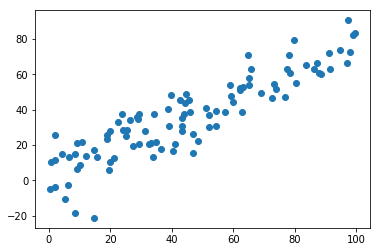

In [4]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [12]:
def f(w,X):
    return sum((X.dot(w))**2)/len(X)

def df(w,X):
    return X.T.dot(X.dot(w))*2./len(X)

def direction(w):
    return w/np.linalg.norm(w)

def first_component(X,initial_w,eta,n_iters=1e4,epsilon=1e-8):
    
    w=direction(initial_w)
    cur_iter=0
    
    while cur_iter<n_iters:
        gradient=df(w,X)
        last_w=w
        w=w+eta*gradient
        w=direction(w)
        if (abs(f(w,X)-f(last_w,X))<epsilon):
            break
            
        cur_iter+=1
    return w

In [13]:
initial_w = np.random.random(X.shape[1])
eta=0.01
w=first_component(X,initial_w,eta)
w

array([0.7803929 , 0.62528947])

In [14]:
X2=np.empty(X.shape)

In [15]:
for i in range(len(X)):
    X2[i]=X[i]- X[i].dot(w)*w

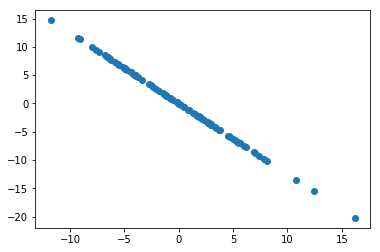

In [16]:
plt.scatter(X2[:,0],X2[:,1])
plt.show()